In [1]:
# Standard code libraries
import numpy as np
import scipy
from scipy.signal import find_peaks

import matplotlib.pyplot as plt

# Custom code libraries from the ReSurfEMG
from resurfemg.postprocessing.baseline import moving_baseline
import resurfemg.preprocessing.envelope as evl
import resurfemg.postprocessing.quality_assessment as qa
import resurfemg.postprocessing.features as feat

from resurfemg.postprocessing.event_detection import onoffpeak_baseline_crossing

%matplotlib widget

In [6]:
# Define signal
fs_emg = 2048
t_emg = np.array([s_t/fs_emg for s_t in range(15*fs_emg)])

y_block = 3*scipy.signal.square((t_emg - 1.25)/5 * 2 * np.pi, duty=0.5)
y_block[y_block < 0] = 0
y_block = y_block

y_baseline = np.ones(y_block.shape)
peaks_env, _ = find_peaks(y_block, prominence=0.1)

(peak_idxs, start_idxs, end_idxs,_, _, _) = onoffpeak_baseline_crossing(
    y_block,
    y_baseline,
    peaks_env
)

In [7]:
aob = feat.time_product(
    y_block,
    fs_emg,
    start_idxs,
    end_idxs,
    y_baseline,
)

aub, y_refs = feat.area_under_baseline(
    y_block,
    fs_emg,
    peak_idxs,
    start_idxs,
    end_idxs,
    aub_window_s=fs_emg*5,
    baseline=y_baseline,
    ref_signal=y_block,
)
etps = aub + aob


In [12]:
print(aub, aob)


[2.5 2.5 2.5] [4.99926758 4.99926758 4.99926758]


In [8]:
qa.percentage_under_baseline(
    y_block,
    fs_emg,
    peak_idxs,
    start_idxs,
    end_idxs,
    y_baseline,
    aub_window_s=None,
    ref_signal=None,
    aub_threshold=40,
)

(array([ True,  True,  True]), array([33.33658886, 33.33658886, 33.33658886]))

Text(0, 0.5, 'Signal (uV)')

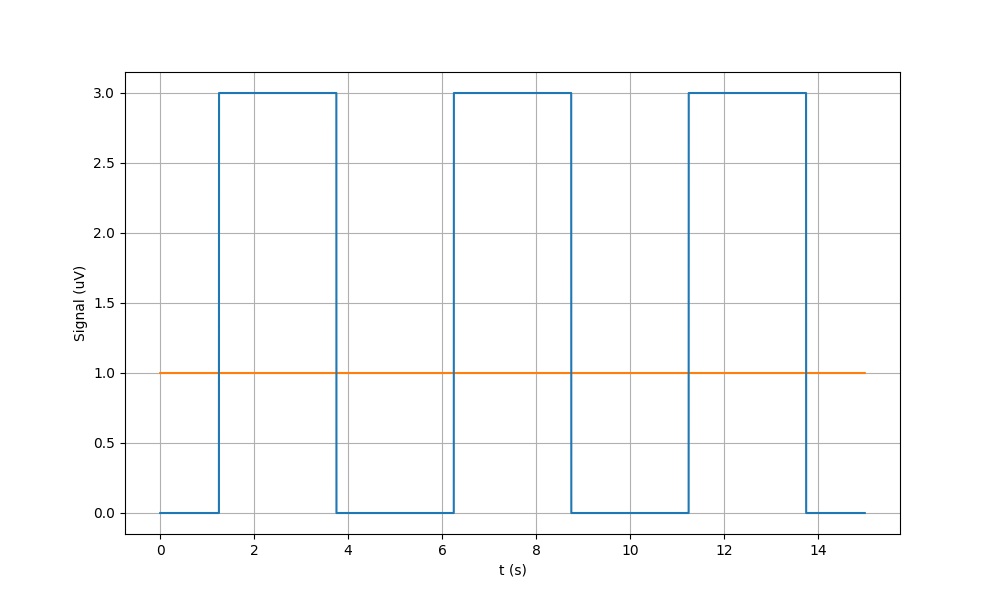

In [9]:
# Plot the raw data
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
axis.grid
axis.grid(True)
axis.plot(t_emg, y_baseline, color='tab:orange')
axis.plot(t_emg, y_block, color='tab:blue')
# axis.plot(t_emg[peak_idxsource], y_block[peak_idxsource], 'x', color='tab:red')
axis.set_xlabel('t (s)')
axis.set_ylabel('Signal (uV)')